In [73]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from data_preprocessing_final import cleaning
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder

In [60]:
housing = pd.read_csv('Ames_HousePrice.csv', index_col = 0)

In [62]:
housing = cleaning(housing)

In [63]:
housing.head()

,PID,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MoSold,YrSold,SaleCondition,Bsmt_Unfin_Ratio,TotalLivArea
1,909176150,126000,30,RL,68.516053,7890,Reg,Lvl,Corner,Gtl,...,0,0,0,166,No_Fence,3,2010,Normal,0.721963,1712.0
2,905476230,139500,120,RL,42.000000,4235,Reg,Lvl,Inside,Gtl,...,105,0,0,0,No_Fence,2,2009,Normal,0.099142,2098.0
3,911128020,124900,30,C (all),60.000000,6060,Reg,Lvl,Inside,Gtl,...,0,42,86,0,No_Fence,11,2007,Normal,0.119474,1838.0
4,535377150,114000,70,RL,80.000000,8146,Reg,Lvl,Corner,Gtl,...,0,168,0,111,No_Fence,5,2009,Normal,1.000000,1444.0
5,534177230,227000,60,RL,70.000000,8400,Reg,Lvl,Inside,Gtl,...,45,0,0,0,No_Fence,11,2009,Normal,0.206173,2475.0


In [64]:
def ord_enc_func(housing):
    housing = housing.reset_index() #duplicated index values in csv need to reset
    housing = housing.drop('index', axis = 1) # drop original index with duplicates
    price = housing['SalePrice'] # Create Y Variable
    
    housing_num = housing.select_dtypes(['int64', 'float64']) # Select numeric data types
    housing_num = housing_num.drop(['PID', 'SalePrice', 'MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold'], axis = 1)
    
    category = housing.select_dtypes('object') #Select all 'object' data types  which are all categorical
    housing_num2cat = housing[['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold']]
    category = pd.concat([category.astype(str), housing_num2cat.astype(str)], axis = 1) #Add all categorical features to dataframe to be encoded
    
    oe = OrdinalEncoder()
    cat_ord_enc = oe.fit_transform(category)
    cat_ord_enc = pd.DataFrame(cat_ord_enc, columns = category.columns)
    full_oe_data = pd.concat([housing_num, cat_ord_enc], axis = 1) #Concatenate encoded data and numeric data
    
    return full_oe_data, pd.DataFrame(price)

In [65]:
X,y = ord_enc_func(housing)

In [66]:
X.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageArea,...,GarageFinish,GarageQual,PavedDrive,Fence,SaleCondition,MSSubClass,OverallQual,OverallCond,MoSold,YrSold
0,68.516053,7890,1939,1950,0.0,2,2,1,1939.0,399.0,...,3.0,5.0,2.0,4.0,4.0,6.0,6.0,5.0,5.0,4.0
1,42.000000,4235,1984,1984,149.0,2,3,0,1984.0,266.0,...,0.0,5.0,2.0,4.0,4.0,0.0,5.0,4.0,4.0,3.0
2,60.000000,6060,1930,2007,0.0,2,3,0,1930.0,216.0,...,3.0,5.0,0.0,4.0,4.0,6.0,5.0,8.0,2.0,1.0
3,80.000000,8146,1900,2003,0.0,2,4,0,1940.0,281.0,...,3.0,5.0,0.0,4.0,4.0,11.0,4.0,7.0,7.0,3.0
4,70.000000,8400,2001,2001,0.0,3,3,0,2001.0,528.0,...,0.0,5.0,2.0,4.0,4.0,10.0,8.0,5.0,2.0,3.0


In [67]:
y.head()

,SalePrice
0,126000
1,139500
2,124900
3,114000
4,227000


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [70]:
X_train.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageArea,...,GarageFinish,GarageQual,PavedDrive,Fence,SaleCondition,MSSubClass,OverallQual,OverallCond,MoSold,YrSold
2053,60.000000,10134,1940,1950,0.0,2,3,0,1940.0,240.0,...,3.0,5.0,2.0,4.0,4.0,9.0,5.0,5.0,9.0,1.0
144,70.000000,8400,1970,1970,0.0,2,2,0,1970.0,525.0,...,0.0,5.0,2.0,2.0,4.0,5.0,4.0,4.0,6.0,4.0
1580,65.000000,8385,1977,1977,220.0,3,3,0,1977.0,328.0,...,3.0,5.0,2.0,4.0,4.0,13.0,5.0,7.0,2.0,2.0
1642,120.000000,9000,1900,2006,0.0,2,4,1,2000.0,576.0,...,3.0,5.0,2.0,2.0,4.0,9.0,5.0,7.0,8.0,1.0
1211,68.516053,14778,1954,2006,72.0,3,4,1,1993.0,924.0,...,3.0,5.0,2.0,4.0,4.0,5.0,6.0,6.0,2.0,2.0


In [71]:
y_train.head()

,SalePrice
2053,109000
144,126000
1580,149900
1642,135000
1211,224000


In [76]:
# Setting up Parameters

gbr = GradientBoostingRegressor()
parameters = {
    "n_estimators":[200, 400, 600, 800, 900, 1000],
    "max_depth":[3, 5, 7],
    "learning_rate":[0.01, 0.05, 0.1, 0.5, 1],
    "subsample":[0.3, 0.8, 0.9, 1]
}

grid_search = GridSearchCV(estimator = gbr, param_grid = parameters, n_jobs = -1)

In [77]:
grid_search.fit(X_train, y_train)

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.5, 1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [200, 400, 600, 800, 900, 1000],
                         'subsample': [0.3, 0.8, 0.9, 1]})

In [79]:
# Getting the best estimator

beast = grid_search.best_estimator_

In [80]:
beast.score(X_train, y_train)

0.9794660337688661

In [81]:
beast.score(X_test, y_test)

0.9098762653394628

In [82]:
beast.feature_importances_

array([1.07781538e-02, 2.52605185e-02, 4.36964758e-02, 1.84818354e-02,
       1.78099592e-02, 3.30125970e-03, 8.36047882e-03, 1.21451577e-02,
       8.28430501e-03, 3.73044946e-02, 5.61672509e-03, 1.01383708e-02,
       2.02198655e-03, 6.12072391e-06, 6.31597289e-03, 1.39213704e-02,
       5.07292457e-01, 2.50887107e-03, 1.03506660e-03, 2.56932268e-03,
       6.54747177e-04, 2.07756122e-03, 9.06772740e-03, 1.69776144e-03,
       1.22306141e-03, 2.14489216e-03, 8.13622957e-04, 2.67660041e-03,
       1.38792967e-03, 3.51181817e-04, 1.05623673e-02, 8.22695872e-04,
       7.99345473e-04, 2.64153870e-02, 6.57175389e-04, 4.70801834e-03,
       3.55469123e-03, 8.08544381e-04, 1.39949366e-03, 3.29566907e-03,
       2.86690113e-02, 2.22825045e-03, 1.76880865e-03, 4.14469640e-03,
       1.62409989e-03, 8.12236448e-04, 9.06903838e-04, 2.52026125e-04,
       4.55908031e-03, 5.29592364e-03, 1.22096229e-01, 1.03853873e-02,
       3.91594031e-03, 1.37403108e-03])

In [85]:
feature_importance = beast.feature_importances_


importantfeats = pd.Series(data = feature_importance, index = X_train.columns).sort_values(ascending = False)

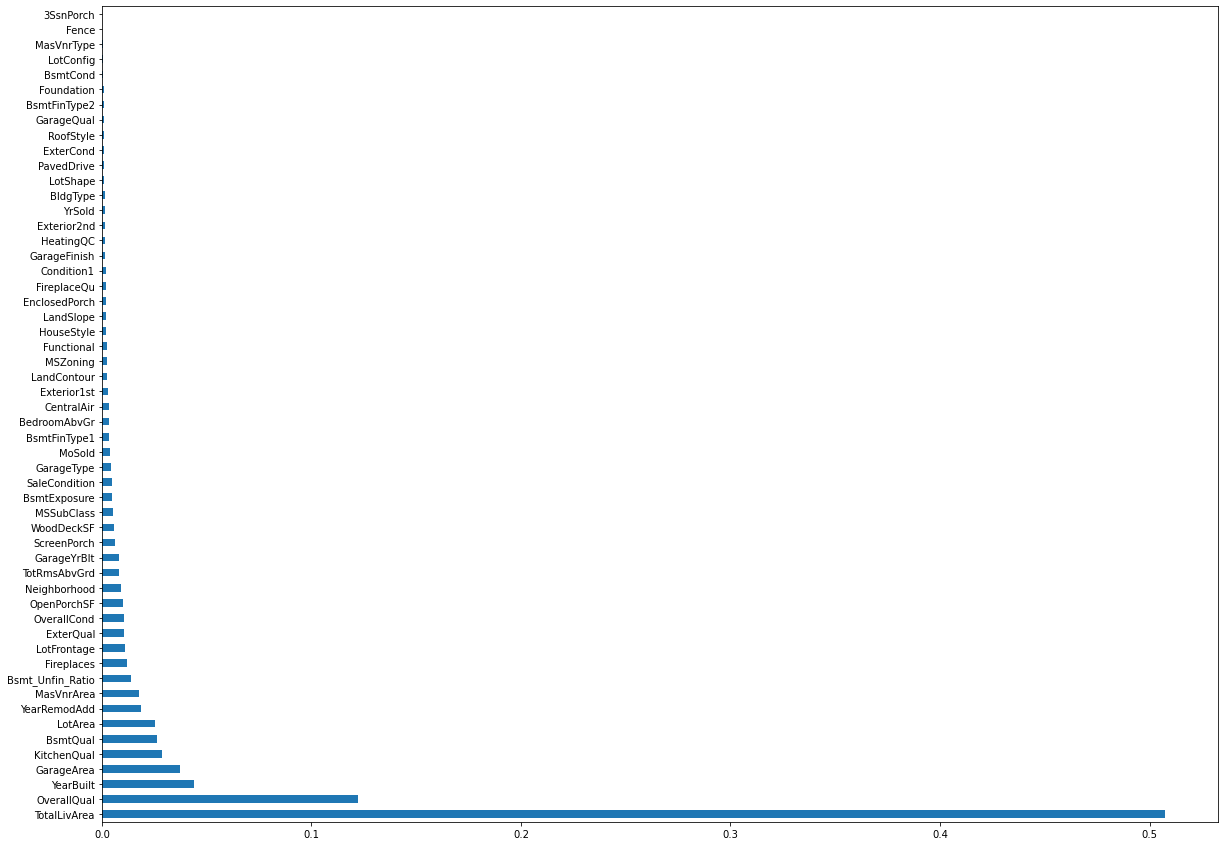

In [94]:
importantfeats.plot.barh(figsize = (20, 15))
